# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Group Details


Name and ID: Deepesh Bhatta - 1001837305

Name and ID: Harsh Vinod Chaludia - 1001744551

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,5/2/1953,GA,NaN,Tornado,Tornado,5/2/1953,5/2/1953,6/1/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,1/1/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,2/1/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,6/2/1953,MI,NaN,Tornado,Tornado,6/2/1953,6/2/1953,2/1/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,6/6/1953,MT,NaN,Flood,Floods,6/6/1953,6/6/1953,12/1/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print("############################################################################################################")
print (">>Task 1-a: Details of df_data data frame are: \n" ) 
df_data.info(verbose=True)
print("############################################################################################################")

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print("############################################################################################################")
print ("\n\n>>Task 1-b: Number of rows:  %s and number of columns:  %s" % (num_rows, num_cols)) 
print("############################################################################################################")

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data
print("############################################################################################################")
print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n",df_data['Start Date'].describe())
print("############################################################################################################")

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = df_data['Disaster Title'].unique().tolist()
unique_county_list = df_data['County'].unique().tolist()
print ("\n\n>>Task 1-d:")
print("############################################################################################################")
print("Total Count of unique values of Disaster Titles",len(disaster_title_list))
print("############################################################################################################")
print(disaster_title_list)
print("############################################################################################################")
print("############################################################################################################")
print("Total Count of unique values of County",len(unique_county_list))
print("############################################################################################################")
print(unique_county_list) 
print("############################################################################################################")




############################################################################################################
>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Declaration Number                46185 non-null  object
 1   Declaration Type                  46185 non-null  object
 2   Declaration Date                  46185 non-null  object
 3   State                             46185 non-null  object
 4   County                            45988 non-null  object
 5   Disaster Type                     46185 non-null  object
 6   Disaster Title                    46185 non-null  object
 7   Start Date                        46185 non-null  object
 8   End Date                          45843 non-null  object
 9   Close Date                        35210 non-nu

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [4]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
df_data['Start Date']= pd.to_datetime(df_data['Start Date'])
df_data['End Date']= pd.to_datetime(df_data['End Date']) 
newData = df_data[df_data['Declaration Type'] == "Emergency"]
newData = newData[(df_data['End Date']- df_data['Start Date']).dt.days > 120]
Emergency_greater_120 = len(newData)
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" % (Emergency_greater_120))

# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.

df_data['Declaration Date']= pd.to_datetime(df_data['Declaration Date'])
newDeclData = df_data[df_data['State'] == "TX"]
newDeclData = newDeclData[(newDeclData['Declaration Date'] > '1998-01-01') & (newDeclData['Declaration Date'] < '1999-12-31')]
num_declarations_1998_1999 = len(newDeclData)

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
n = 10

newDistData = df_data[df_data['Declaration Type'] == "Disaster"]
newDistData = newDistData['County'].value_counts().head(10)
top10_disasters=newDistData

newEmerData = df_data[df_data['Declaration Type'] == "Emergency"]
newEmerData = newEmerData['County'].value_counts().head(10)
top10_emergencies=newEmerData

print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))

>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are 597


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 562


>>Task 2-c: top 10 counties with the most disasters for all years are: 
Washington County    294
Jefferson County     286
Jackson County       271
Franklin County      265
Lincoln County       242
Clay County          220
Madison County       206
Montgomery County    205
Monroe County        197
Marion County        191
Name: County, dtype: int64


>>Task 2-c: top 10 counties with the most emergencies for all years are: 
Washington County    107
Franklin County       94
Jackson County        80
Jefferson County      78
Montgomery County     77
Monroe County         67
Lincoln County        66
Madison County        60
Marion County         59
Warren County         59
Name: County, dtype: int64


C:\Users\AvengersEndGame\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

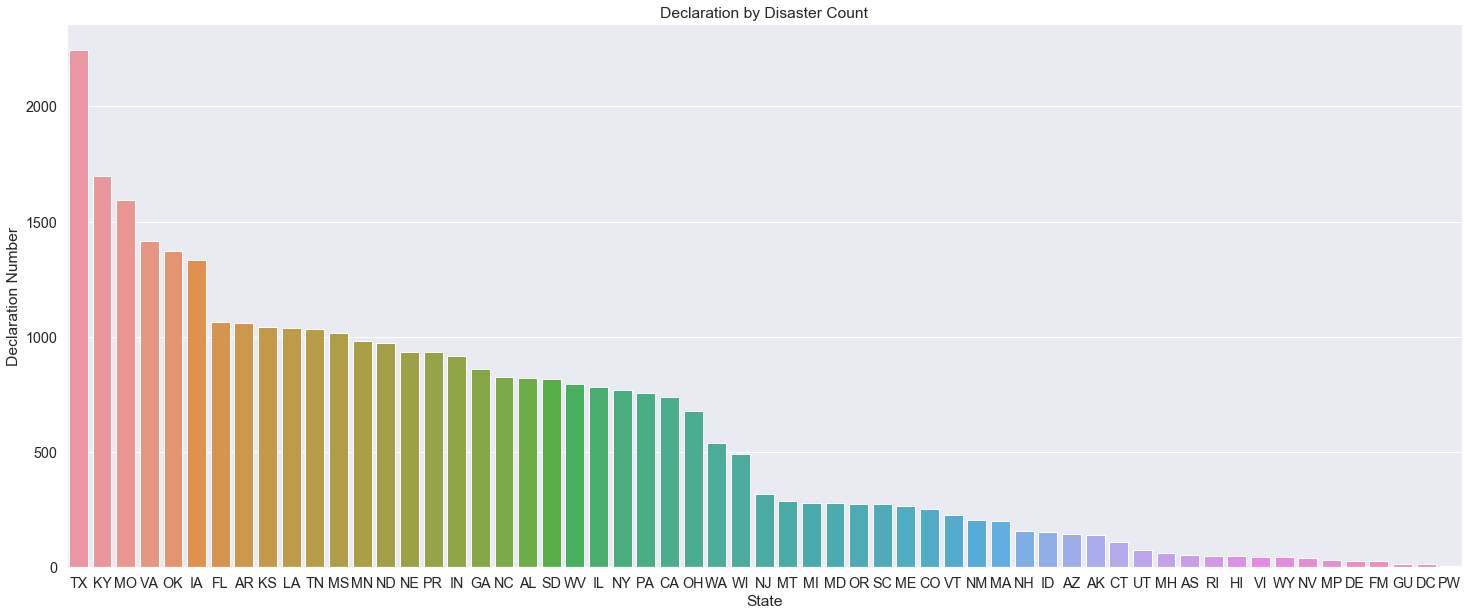

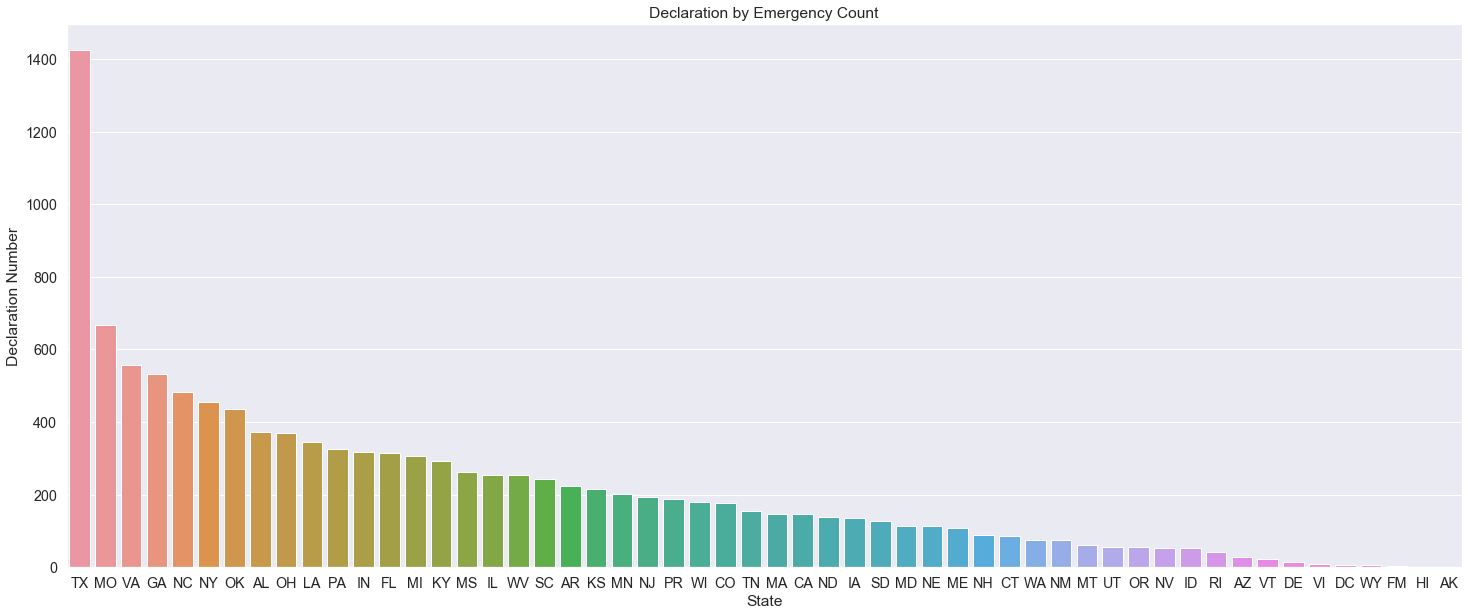

In [5]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
newDistData = df_data[df_data['Declaration Type'] == "Disaster"]
newEmerData = df_data[df_data['Declaration Type'] == "Emergency"]
Disaster = newDistData.groupby(['State']).count().reset_index().iloc[:,range(2)]
Emergency = newEmerData.groupby(['State']).count().reset_index().iloc[:,range(2)]

fig,ax1=plt.subplots(figsize=(25,10))
ax1.set_title('Declaration by Disaster Count')
sns.barplot(x='State',y='Declaration Number',data=Disaster.sort_values(['Declaration Number'],ascending=False))


fig,ax1=plt.subplots(figsize=(25,10))
ax1.set_title('Declaration by Emergency Count')
sns.barplot(x='State',y='Declaration Number',data=Emergency.sort_values(['Declaration Number'],ascending=False))

#########################end code for Task 3-a

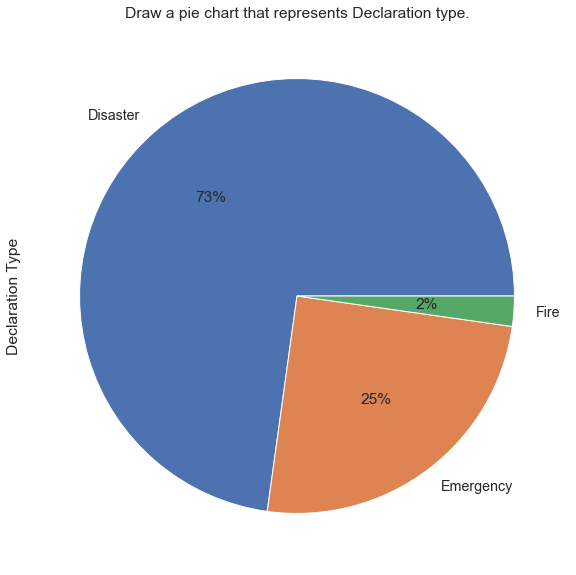

In [20]:
# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########################begin code for Task 3-b 
fig,ax1=plt.subplots(figsize=(25,10))
ax1.set_title('Draw a pie chart that represents Declaration type.')
df_data['Declaration Type'].value_counts().plot(kind='pie', autopct='%1.0f%%',label='Declaration Type')
#########################end code for Task 3-b


# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

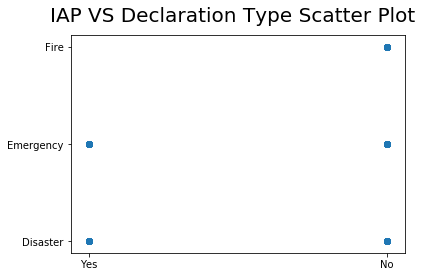

In [8]:
#########################begin code for Task 4
fig = plt.figure()
fig.suptitle('IAP VS Declaration Type Scatter Plot', fontsize=20)
dataframe = pd.read_csv("database.csv")
x = dataframe["Individual Assistance Program"]
y = dataframe["Declaration Type"]
plt.scatter(x, y)
plt.show()
# from graph we can see that for fire "Declaration Type" IAP wsa not provided while in other case it is depended on other attributes.

#########################end code for Task 4

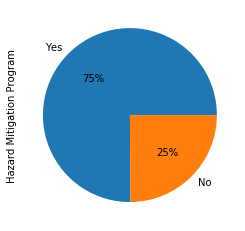

In [19]:
df_data['Hazard Mitigation Program'].value_counts().plot(kind='pie', autopct='%1.0f%%')
# HAP was provided in 75% of cases

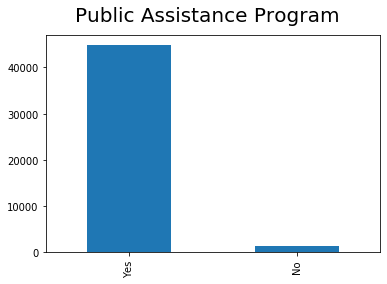

In [13]:
fig = plt.figure()
fig.suptitle('Public Assistance Program', fontsize=20)
df_data["Public Assistance Program"].value_counts().plot(kind="bar")
# In most of the cases PAP was provided.



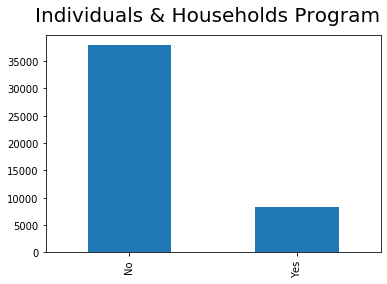

In [22]:
fig = plt.figure()
fig.suptitle('Individuals & Households Program', fontsize=20)
df_data["Individuals & Households Program"].value_counts().plot(kind="bar")
# In most of the cases IHP was not provided.

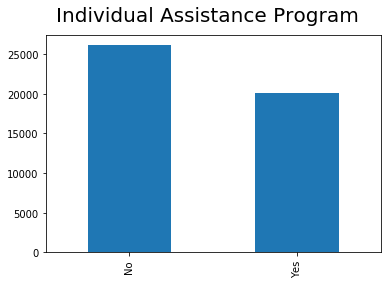

In [23]:
fig = plt.figure()
fig.suptitle('Individual Assistance Program', fontsize=20)
df_data["Individual Assistance Program"].value_counts().plot(kind="bar")
# We can say not provided cases are 5000 plus than provided cases.

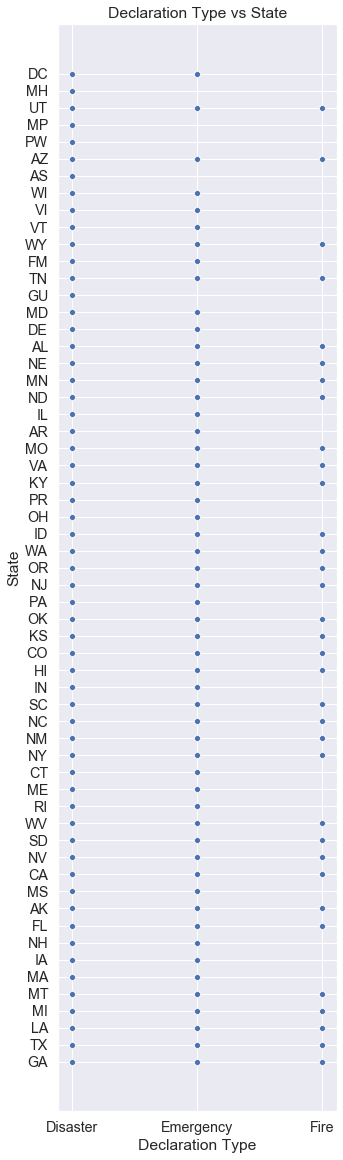

In [25]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)
fig,ax1=plt.subplots(figsize=(5,20))
ax1.set_title('Declaration Type vs State')
sns.scatterplot(x='Declaration Type', y = 'State', data = df_data)
# Disaster was declared in all state whereas Emergency was not declared in only few state, and fire has equal proportion.

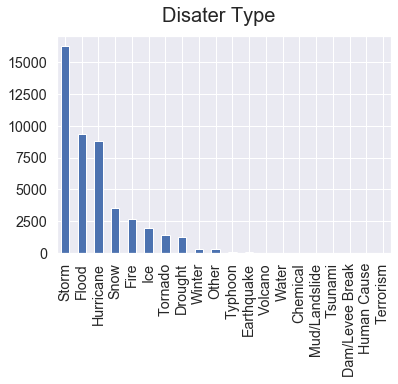

In [26]:
fig = plt.figure()
fig.suptitle('Disater Type', fontsize=20)
df_data["Disaster Type"].value_counts().plot(kind="bar")

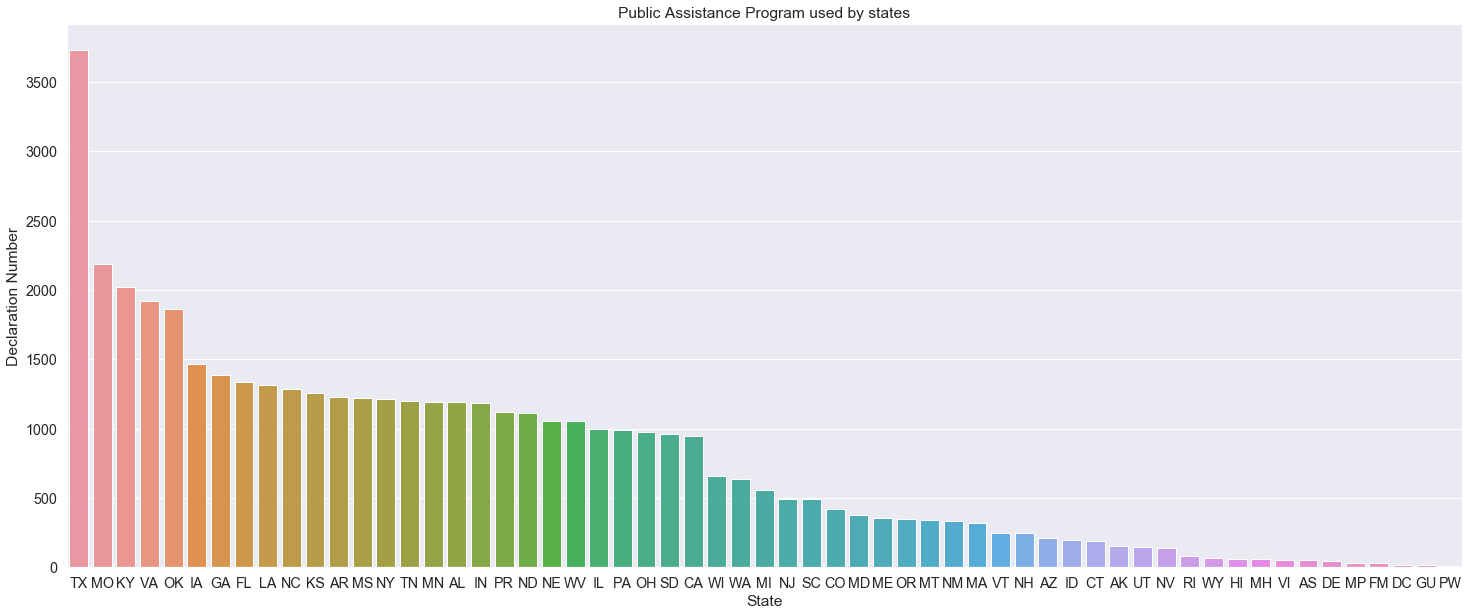

In [27]:
newDistData = df_data[df_data['Public Assistance Program'] == "Yes"]
pap_yes = newDistData.groupby(['State']).count().reset_index().iloc[:,range(2)]

fig,ax1=plt.subplots(figsize=(25,10))
ax1.set_title('Public Assistance Program used by states')
sns.barplot(x='State',y='Declaration Number',data=pap_yes.sort_values(['Declaration Number'],ascending=False))
#TX is the sate which has been provided most PAP wheras PW is state that has been provided zero PAP

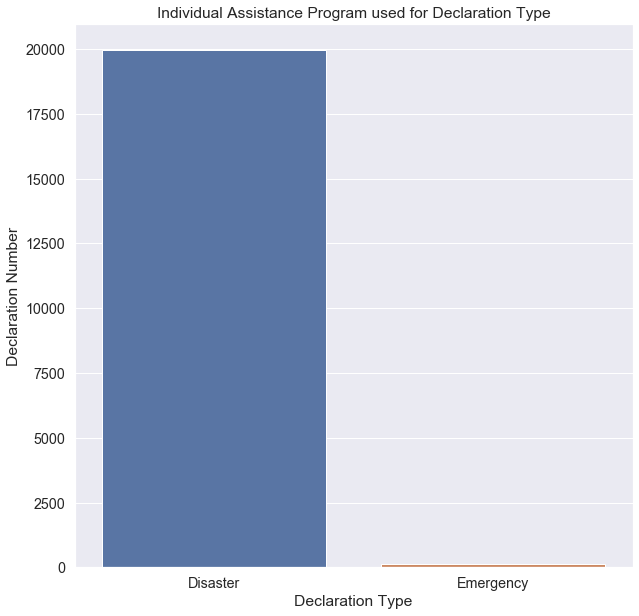

In [35]:
newDistData = df_data[df_data['Individual Assistance Program'] == "Yes"]
iap_yes = newDistData.groupby(['Declaration Type']).count().reset_index().iloc[:,range(3)]

fig,ax1=plt.subplots(figsize=(10,10))
ax1.set_title('Individual Assistance Program used for Declaration Type')
sns.barplot(x='Declaration Type',y='Declaration Number',data=iap_yes.sort_values(['Declaration Number'],ascending=False))
#IAP was provided mostly in Disaster case, very few in Emergency and not at all in Fire

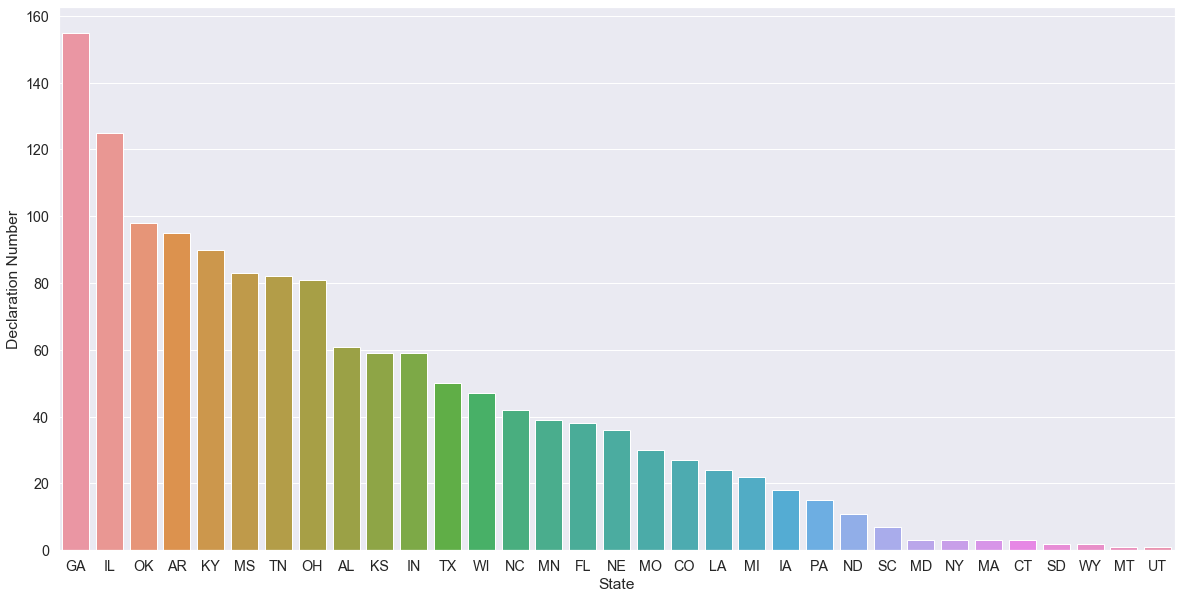

In [42]:
newDistData = df_data[df_data['Disaster Type'] == "Tornado"]
tornado = newDistData.groupby(['State']).count().reset_index().iloc[:,range(3)]

fig,ax1=plt.subplots(figsize=(20,10))
ax1.set_title('')
sns.barplot(x='State',y='Declaration Number',data=tornado.sort_values(['Declaration Number'],ascending=False))
#GA is the state with most Tornado cases while UT is the state with least Tornado Case, So GA is most likely to have Tornado In Disaster case.

# Task 5:

Use Weka to 
1) Find out how to convert the used dataset in weka format 
2) Convert it 
3) use the weka visualizer to produce some graphs.

In [ ]:
# 20 point
#########################begin code for Task 5
#We can goto weka tools and open database.csv file in arff viewer, before that anyvalue that contain 
# ' should be surrounded with "" to make sure that there is no error while reading values.
# and finally we can save it as arff file, it adds @relation, @attribute and data so it can be analyzed properly.

#########################end code for Task 5